In [17]:
import torchvision 
import torch
from torch import nn, optim
import torch.utils.data  as Data 
import matplotlib.pyplot  as plt


BATCH_SIZE = 64

In [18]:
#下载数据
data_train = torchvision.datasets.MNIST(root = './data',train = True,transform=torchvision.transforms.ToTensor(),download = False)#转化为tensor类型
data_test = torchvision.datasets.MNIST(root = './data', train = False,download = False)

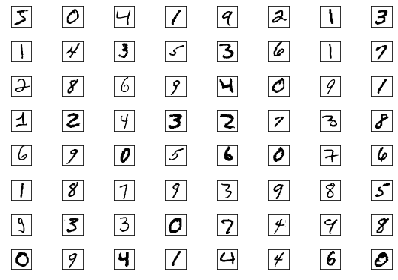

In [19]:
#matplotlib可视化
train_data = Data.DataLoader(data_train,batch_size = BATCH_SIZE,shuffle=False)#加载数据
data = enumerate(train_data)
batch_idx, (imgs, labels) = next(data)

fig, ax = plt.subplots(nrows=8, ncols=8, sharex='all', sharey='all')#设置整个图
ax = ax.flatten()

for i in range(64):
    img = imgs[i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')#子图
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()


In [106]:
#数据处理
data_transf = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),#转化为TENSOR
     torchvision.transforms.Normalize([0.5], [0.5])])#归一化

x_train_data = torchvision.datasets.MNIST(root = './data',train = True,transform=data_transf,download = False)#转化为tensor类型
y_test_data = torchvision.datasets.MNIST(root = './data', train = False,transform=data_transf,download = False)

In [120]:
#参数设置
batch_size = 64
learn = 0.01
epoch = 3

In [121]:
x_train = Data.DataLoader(x_train_data,batch_size = batch_size,shuffle=False)#加载数据
y_train = Data.DataLoader(y_test_data,batch_size = batch_size,shuffle=False)

In [122]:
import torch.nn.functional as F
import torch.optim as optim
#模型建立
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        
        self.conv1 = nn.Conv2d(1,20,3)
        self.conv2 = nn.Conv2d(20,40,3)
        
        self.fc1 = nn.Linear(40*11*11,500)
        self.fc2 = nn.Linear(500,10)
        
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),2,2)
        x = F.relu(self.conv2(x))
        #print(x.size())
        x = x.view(-1,40*11*11)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x
    

In [124]:
#实例化
model = CNN()

if torch.cuda.is_available():
    model = model.cuda()

#优化器与损失函数
optimizer = optim.SGD(model.parameters(),lr=learn,momentum=0.5)
get_loss = nn.CrossEntropyLoss()


In [125]:
#训练
print("Start training")
item = 0
log = []
for i in range(epoch):
    for data in x_train:
        img, label = data
        if torch.cuda.is_available():
            img = img.cuda()
            label = label.cuda()
        else:
            img = img
            label = label
            
        output = model(img)
        loss = get_loss(output,label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        item+=1
        log.append([item,loss.data.item()])
        if item%50 == 0:
            print('epoch: {}, item:{}, loss: {:.4}'.format(epoch, item, loss.data.item()))

Start training
epoch: 3, item:50, loss: 2.071
epoch: 3, item:100, loss: 0.8642
epoch: 3, item:150, loss: 0.6022
epoch: 3, item:200, loss: 0.5466
epoch: 3, item:250, loss: 0.6105
epoch: 3, item:300, loss: 0.3808
epoch: 3, item:350, loss: 0.1327
epoch: 3, item:400, loss: 0.3828
epoch: 3, item:450, loss: 0.2534
epoch: 3, item:500, loss: 0.3427
epoch: 3, item:550, loss: 0.2778
epoch: 3, item:600, loss: 0.2676
epoch: 3, item:650, loss: 0.3258
epoch: 3, item:700, loss: 0.198
epoch: 3, item:750, loss: 0.2384
epoch: 3, item:800, loss: 0.2955
epoch: 3, item:850, loss: 0.2491
epoch: 3, item:900, loss: 0.1138
epoch: 3, item:950, loss: 0.2325
epoch: 3, item:1000, loss: 0.08129
epoch: 3, item:1050, loss: 0.1998
epoch: 3, item:1100, loss: 0.1824
epoch: 3, item:1150, loss: 0.1614
epoch: 3, item:1200, loss: 0.2283
epoch: 3, item:1250, loss: 0.1323
epoch: 3, item:1300, loss: 0.1833
epoch: 3, item:1350, loss: 0.1427
epoch: 3, item:1400, loss: 0.1205
epoch: 3, item:1450, loss: 0.1025
epoch: 3, item:1500,

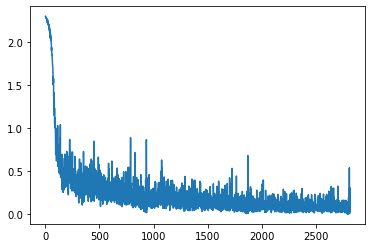

In [127]:
#数据可视化
import numpy as np
log = np.array(log)
plt.plot(log[:,0],log[:,1])

In [126]:
#测试
print('Start test')
test_loss = 0
test_acc = 0

for data in y_train:
    img, label = data
    if torch.cuda.is_available():
            img = img.cuda()
            label = label.cuda()
    
    output = model(img)
    loss = get_loss(output,label)
        
    test_loss += loss.data.item()*label.size(0)
    _,pred = torch.max(output, 1)
    num_correct = (pred == label).sum()
    test_acc += num_correct.item()
print('Test Loss: {:.6f}, Acc: {:.6f}'.format(test_loss / (len(y_train)), test_acc / (len(y_train))))
    

Start test
Test Loss: 4.870723, Acc: 62.171975
